## Toolbox basics

This notebook illustrates basic usage of the toolbox. It can be opened interactively on Google Colab by clicking on the button below.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Priesemann-Group/mrestimator/blob/master/examples/basic_usage.ipynb)

If you are running it on Colab you can install the toolbox running the next cell:

In [ ]:
!pip install git+https://github.com/Priesemann-Group/mrestimator.git

First lets import the toolbox:

In [2]:
# imports the toolbox
import mrestimator as mre

# ensures that the plots are embedded in the notebook
%matplotlib inline 

INFO     Loaded mrestimator v0.1.6, writing to /tmp/mre_joaopn/
INFO     Using numba for parallelizable functions


Now we generate some example data from a subsampled branching process. This is done with `simulate_branching`, which takes as main arguments the branching parameter `m`, the average population activity `a` and the fraction `subp` of activity that is observed.

In [3]:
data = mre.simulate_branching(
    m=0.98, a=1000, subp=0.05, length=20000, numtrials=10, seed=43771
)

INFO     Generating branching process with m=0.98
INFO     Setting up stationarity, 1000 steps


The full analysis is performed with `full_analysis`, which calculates the autocorrelation coefficients, fits the autocorrelation functions and plots the results. The main arguments are the maximum number of time units `kmax` to use for the fit, and the `coefficientmethod` used, which depends on data structure. Please refer to the main paper for details: [link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0249447)

INFO     input_handler() detected ndarray of numbers
INFO     input_handler() returning ndarray with 10 trial(s) and 20000 datapoints
INFO     coefficients() with 'trialseparated' method for 10 trials of length 20000.
INFO     Bootstrapping 100 replicas
INFO     100 bootstrap replicas done
INFO     Unbound fit to $|A| e^{-k/\tau}$
INFO     Fitting with 5 different start values
INFO     Bootstrapping 100 replicas (5 fits each)
INFO     Finished fitting the data to f_exponential,
         mre = 0.97980(71), tau = 48.99(1.75) bp steps, ssres = 0.04350
INFO     Unbound fit to $|A| e^{-k/\tau} + O$
INFO     Fitting with 5 different start values
INFO     Bootstrapping 100 replicas (5 fits each)
INFO     Finished fitting the data to f_exponential_offset,
         mre = 0.98090(53), tau = 51.86(1.45) bp steps, ssres = 0.02010
INFO     full_analysis() done


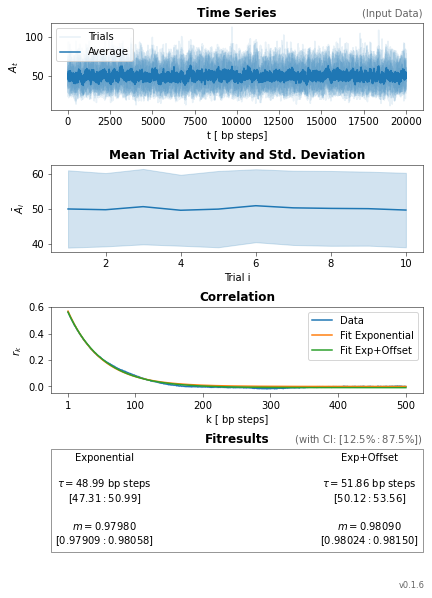

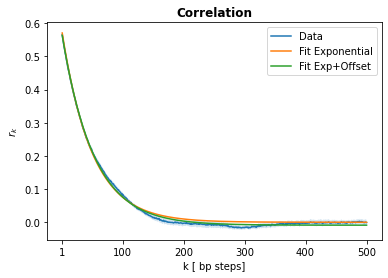

In [4]:
result = mre.full_analysis(
    data,
    kmax=500,
    coefficientmethod="trialseparated",
    dt=1,
    dtunit=" bp steps",
    fitfuncs=["e", "eo"],
)